In [43]:
# importing the libraries and  packages
import pandas as pd
import numpy as np
import math as m
import seaborn as sns
sns.set_style("darkgrid")
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [2]:
# Loading the dataset
data = pd.read_csv("50_Startups.csv")
data.head(2)

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.2,136897.80,471784.10,New York,192261.83
1,162597.7,151377.59,443898.53,California,191792.06


In [4]:
# renaming the columns
data=data.rename({ "R&D Spend":'R&D',"Marketing Spend":'marketing',"Administration":"administration","State":"state","Profit":"profit"},axis=1)
data.head(5)

,R&D,administration,marketing,state,profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
# checking the missing values
data.isnull().sum()

R&D               0
administration    0
marketing         0
state             0
profit            0
dtype: int64

In [6]:
# printing basic info about the data
print(data.columns)
print("Data types---")
print("==========================")
print(data.dtypes)
print("==========================")
print("Info---")
print(data.info())
print("==========================")

Index(['R&D', 'administration', 'marketing', 'state', 'profit'], dtype='object')
Data types---
R&D               float64
administration    float64
marketing         float64
state              object
profit            float64
dtype: object
Info---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   R&D             50 non-null     float64
 1   administration  50 non-null     float64
 2   marketing       50 non-null     float64
 3   state           50 non-null     object 
 4   profit          50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB
None


In [7]:
print("Average spend on R&D:")
print(data["R&D"].mean())
print("==========================")
print("Average spend on administration:")
print(data["administration"].mean())
print("==========================")
print("Average spend on marketing:")
print(data["marketing"].mean())
print("==========================")
print("Average profit earned:")
print(data["profit"].mean())
print("==========================")

Average spend on R&D:
73721.61559999999
Average spend on administration:
121344.63959999995
Average spend on marketing:
211025.09780000005
Average profit earned:
112012.63920000002


In [8]:
lb= LabelEncoder()
data["state"]=lb.fit_transform(data["state"])

In [9]:
print(data.head())
print(data.dtypes)

         R&D  administration  marketing  state     profit
0  165349.20       136897.80  471784.10      2  192261.83
1  162597.70       151377.59  443898.53      0  191792.06
2  153441.51       101145.55  407934.54      1  191050.39
3  144372.41       118671.85  383199.62      2  182901.99
4  142107.34        91391.77  366168.42      1  166187.94
R&D               float64
administration    float64
marketing         float64
state               int32
profit            float64
dtype: object


## Exploratory Data Analysis

<AxesSubplot:>

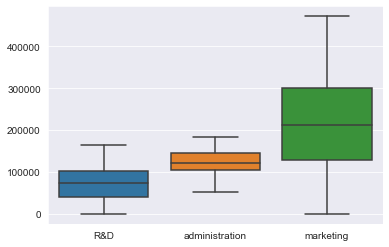

In [10]:
# checking the outliers
sns.boxplot(data=data.loc[:, ['R&D', 'administration','marketing']],palette="tab10")

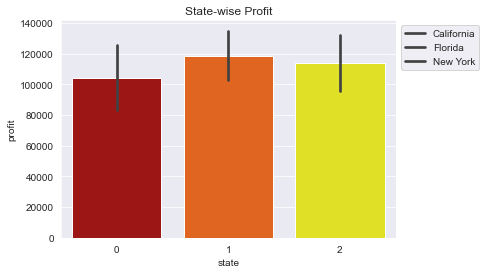

In [11]:
## statewise profit
ax=sns.barplot(x=data["state"],y=data["profit"],data=data,palette="hot")
plt.title("State-wise Profit")
ax.legend( bbox_to_anchor=(1,1),labels=["California","Florida","New York"])

Text(0.5, 1.0, 'Statewise profit percentages')

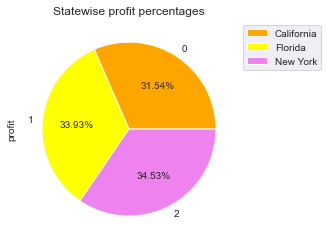

In [12]:
ax=data.groupby(["state"])["profit"].sum().plot(kind="pie",colors=['orange','yellow','violet'],autopct='%.2f%%')
ax.legend( bbox_to_anchor=(1,1),labels=["California","Florida","New York"])
plt.title("Statewise profit percentages")

Text(0.5, 1.0, 'R&D Spend VS Profit')

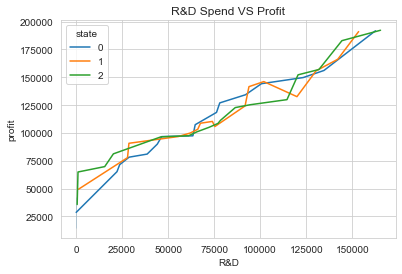

In [13]:
sns.set_style("whitegrid")
sns.lineplot(x="R&D",y="profit",data=data,hue="state",palette='tab10')
plt.title("R&D Spend VS Profit")

Text(0.5, 1.0, 'Administration Spend VS Profit')

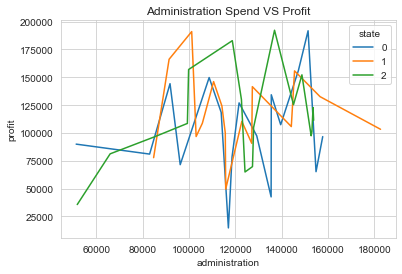

In [14]:
sns.set_style("whitegrid")
sns.lineplot(x="administration",y="profit",data=data,hue="state",palette= 'tab10')
plt.title("Administration Spend VS Profit")

Text(0.5, 1.0, 'Marketing Spend VS Profit')

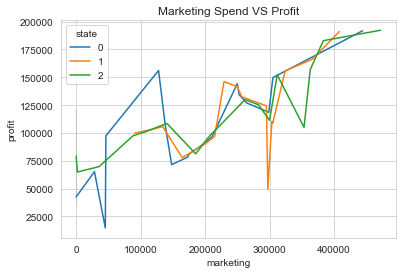

In [15]:
sns.set_style("whitegrid")
sns.lineplot(x="marketing",y="profit",data=data,hue="state",palette="tab10")
plt.title("Marketing Spend VS Profit")

<AxesSubplot:>

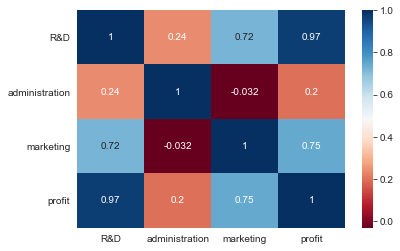

In [16]:
sns.heatmap(data[["R&D","administration","marketing","profit"]].corr(),annot=True,cmap="RdBu")

## Linear Regression

### Prediction model for profit of 50 startups data

In [17]:
# multiple linear regression
df=data[["R&D","administration","marketing","profit"]]
print(df.head())

         R&D  administration  marketing     profit
0  165349.20       136897.80  471784.10  192261.83
1  162597.70       151377.59  443898.53  191792.06
2  153441.51       101145.55  407934.54  191050.39
3  144372.41       118671.85  383199.62  182901.99
4  142107.34        91391.77  366168.42  166187.94


In [18]:
df.shape

(50, 4)

In [19]:
# train test split
training,testing=train_test_split(df,test_size=0.2)
training.head()

,R&D,administration,marketing,profit
9,123334.88,108679.17,304981.62,149759.96
12,93863.75,127320.38,249839.44,141585.52
46,1315.46,115816.21,297114.46,49490.75
49,0.00,116983.80,45173.06,14681.40
38,20229.59,65947.93,185265.10,81229.06


In [20]:
testing.head()

,R&D,administration,marketing,profit
21,78389.47,153773.43,299737.29,111313.02
6,134615.46,147198.87,127716.82,156122.51
11,100671.96,91790.61,249744.55,144259.40
32,63408.86,129219.61,46085.25,97427.84
35,46014.02,85047.44,205517.64,96479.51


In [21]:
training.shape,testing.shape

((40, 4), (10, 4))

In [51]:
# defining
X_train=training[["R&D","administration","marketing"]]
y_train=training["profit"]
X_test=testing[["R&D","administration","marketing"]]
y_test=testing["profit"]

In [23]:
model=LinearRegression()
print(model)

LinearRegression()


In [24]:
train_model=model.fit(X_train,y_train)
print("Model training is completed")
print(train_model)

Model training is completed
LinearRegression()


In [25]:
print(model.coef_)
print(model.intercept_)

[0.81409869 0.01491992 0.0269828 ]
44935.46033920918


In [42]:
train_model.score(X_train,y_train)

0.9541238817717693

In [27]:
RD =76253.86
administration=113867.30
marketing=298664.47
y =0.80733789*RD -0.02881059*administration+ 0.02881124*marketing + 50343.43195926117
print("Profit earned with R&D spend of {},administration spend of {} and marketing spend of {} is {} ".format(RD,administration,marketing,y))


Profit earned with R&D spend of 76253.86,administration spend of 113867.3 and marketing spend of 298664.47 is 117230.37202595237 


<AxesSubplot:xlabel='R&D', ylabel='profit'>

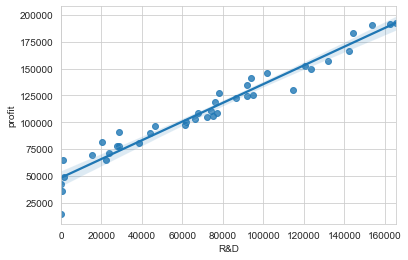

In [28]:
sns.regplot(x="R&D",y="profit",data=training)

<AxesSubplot:xlabel='administration', ylabel='profit'>

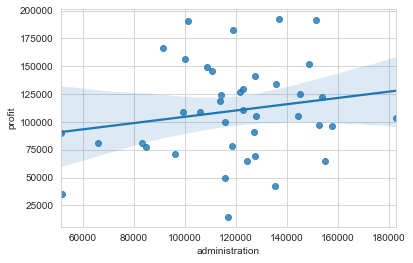

In [29]:
sns.regplot(x="administration",y="profit",data=training)

<AxesSubplot:xlabel='marketing', ylabel='profit'>

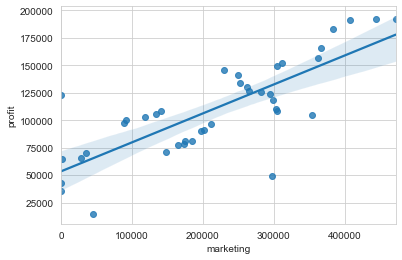

In [30]:
sns.regplot(x="marketing",y="profit",data=training)

In [31]:
X_test=testing[["R&D","administration","marketing"]]
X_test

,R&D,administration,marketing
21,78389.47,153773.43,299737.29
6,134615.46,147198.87,127716.82
11,100671.96,91790.61,249744.55
32,63408.86,129219.61,46085.25
35,46014.02,85047.44,205517.64
29,65605.48,153032.06,107138.38
14,119943.24,156547.42,256512.92
7,130298.13,145530.06,323876.68
25,64664.71,139553.16,137962.62
33,55493.95,103057.49,214634.81


In [32]:
pred_profit=train_model.predict(X_test)
pred_profit

array([119134.26299916, 160168.08280522, 135000.68629365,  99727.98567582,
        89209.75552643, 103518.91517345, 151838.20619836, 161921.39306302,
       103383.65560014,  97442.06941241])

In [33]:
testing["pred_profit"]=pred_profit
testing

<ipython-input-33-80f0bca438c1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing["pred_profit"]=pred_profit


,R&D,administration,marketing,profit,pred_profit
21,78389.47,153773.43,299737.29,111313.02,119134.262999
6,134615.46,147198.87,127716.82,156122.51,160168.082805
11,100671.96,91790.61,249744.55,144259.40,135000.686294
32,63408.86,129219.61,46085.25,97427.84,99727.985676
35,46014.02,85047.44,205517.64,96479.51,89209.755526
29,65605.48,153032.06,107138.38,101004.64,103518.915173
14,119943.24,156547.42,256512.92,132602.65,151838.206198
7,130298.13,145530.06,323876.68,155752.60,161921.393063
25,64664.71,139553.16,137962.62,107404.34,103383.655600
33,55493.95,103057.49,214634.81,96778.92,97442.069412


In [34]:
testing["Error"]=testing["profit"]-testing["pred_profit"]
testing

<ipython-input-34-d631f1c84544>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  testing["Error"]=testing["profit"]-testing["pred_profit"]


,R&D,administration,marketing,profit,pred_profit,Error
21,78389.47,153773.43,299737.29,111313.02,119134.262999,-7821.242999
6,134615.46,147198.87,127716.82,156122.51,160168.082805,-4045.572805
11,100671.96,91790.61,249744.55,144259.40,135000.686294,9258.713706
32,63408.86,129219.61,46085.25,97427.84,99727.985676,-2300.145676
35,46014.02,85047.44,205517.64,96479.51,89209.755526,7269.754474
29,65605.48,153032.06,107138.38,101004.64,103518.915173,-2514.275173
14,119943.24,156547.42,256512.92,132602.65,151838.206198,-19235.556198
7,130298.13,145530.06,323876.68,155752.60,161921.393063,-6168.793063
25,64664.71,139553.16,137962.62,107404.34,103383.655600,4020.684400
33,55493.95,103057.49,214634.81,96778.92,97442.069412,-663.149412


In [68]:
mltpl_r2 = r2_score(testing['profit'],testing['pred_profit'])
mltpl_r2

0.8819679466294933

<AxesSubplot:xlabel='R&D', ylabel='profit'>

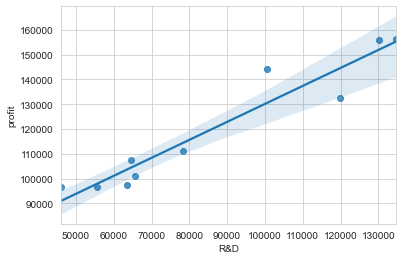

In [36]:
sns.regplot(x="R&D",y="profit",data=testing)

<AxesSubplot:xlabel='administration', ylabel='profit'>

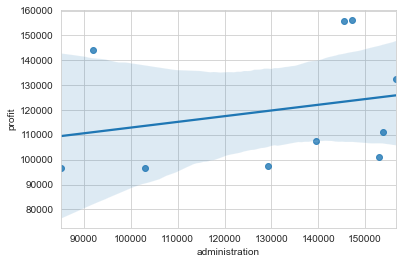

In [37]:
sns.regplot(x="administration",y="profit",data=testing)

<AxesSubplot:xlabel='marketing', ylabel='profit'>

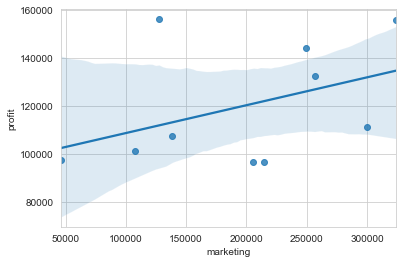

In [38]:
sns.regplot(x="marketing",y="profit",data=testing)

## Ridge Regression

In [63]:
rd = Ridge(0.5)

In [59]:
train_model_1 = rd.fit(X_train,y_train)
print("The model training is completed")

The model training is completed


In [60]:
print("Accuracy of the training data - ")
train_model_1.score(X_train,y_train)

Accuracy of the training data - 


0.9541238817717693

In [61]:
pred_1 = train_model_1.predict(X_test)
pred_1

array([119134.26299931, 160168.08280482, 135000.68629351,  99727.98567562,
        89209.75552649, 103518.91517338, 151838.20619823, 161921.39306292,
       103383.65560009,  97442.06941246])

In [66]:
ridg_r2 = r2_score(y_test,pred_1)
ridg_r2

0.8819679466305154

In [70]:
d2={'Prep_Models':['1st_Model','2nd_Model'],'Rsquared':[mltpl_r2,ridg_r2]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,1st_Model,0.881968
1,2nd_Model,0.881968
